## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], regular='l1', ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    if regular == 'l1':
        kernel_regularizer=l1(ratio)
    elif regular == 'l2':
        kernel_regularizer=l2(ratio)  
    elif regular == 'l1_l2':
        kernel_regularizer=l1_l2(ratio)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=kernel_regularizer)(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=kernel_regularizer)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
regular_list = {'l1', 'l2', 'l1_l2'}

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regular in regular_list:
    print(regular)
    for regulizer_ratio in L2_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
        model = build_mlp(input_shape=x_train.shape[1:], regular=regular, ratio=regulizer_ratio)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "exp-%s-%s" % (regular,str(regulizer_ratio))
        results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


l1_l2
Experiment with Regulizer = 0.010000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for 

50000/50000 [==============================] - 14s 283us/step - loss: 7.1030 - acc: 0.4151 - val_loss: 6.6644 - val_acc: 0.4192
Epoch 9/30
50000/50000 [==============================] - 14s 285us/step - loss: 6.2741 - acc: 0.4169 - val_loss: 5.9037 - val_acc: 0.4194
Epoch 10/30
50000/50000 [==============================] - 14s 284us/step - loss: 5.5694 - acc: 0.4237 - val_loss: 5.2539 - val_acc: 0.4285
Epoch 11/30
50000/50000 [==============================] - 14s 283us/step - loss: 4.9692 - acc: 0.4271 - val_loss: 4.7000 - val_acc: 0.4300
Epoch 12/30
50000/50000 [==============================] - 15s 292us/step - loss: 4.4596 - acc: 0.4297 - val_loss: 4.2307 - val_acc: 0.4314
Epoch 13/30
50000/50000 [==============================] - 14s 280us/step - loss: 4.0251 - acc: 0.4329 - val_loss: 3.8289 - val_acc: 0.4368
Epoch 14/30
50000/50000 [==============================] - 14s 284us/step - loss: 3.6584 - acc: 0.4361 - val_loss: 3.4978 - val_acc: 0.4399
Epoch 15/30
50000/50000 [========

50000/50000 [==============================] - 14s 285us/step - loss: 1.8580 - acc: 0.4920 - val_loss: 1.9044 - val_acc: 0.4613
Epoch 29/30
50000/50000 [==============================] - 14s 288us/step - loss: 1.8252 - acc: 0.4927 - val_loss: 1.8866 - val_acc: 0.4594
Epoch 30/30
50000/50000 [==============================] - 14s 289us/step - loss: 1.7988 - acc: 0.4968 - val_loss: 1.8708 - val_acc: 0.4634
Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)      

Epoch 10/30
50000/50000 [==============================] - 13s 270us/step - loss: 4.9103 - acc: 0.4379 - val_loss: 4.6760 - val_acc: 0.4340
Epoch 11/30
50000/50000 [==============================] - 13s 270us/step - loss: 4.4442 - acc: 0.4452 - val_loss: 4.2415 - val_acc: 0.4405
Epoch 12/30
50000/50000 [==============================] - 14s 270us/step - loss: 4.0467 - acc: 0.4473 - val_loss: 3.8835 - val_acc: 0.4462
Epoch 13/30
50000/50000 [==============================] - 14s 271us/step - loss: 3.7066 - acc: 0.4510 - val_loss: 3.5599 - val_acc: 0.4468
Epoch 14/30
50000/50000 [==============================] - 14s 273us/step - loss: 3.4149 - acc: 0.4539 - val_loss: 3.2899 - val_acc: 0.4530
Epoch 15/30
50000/50000 [==============================] - 13s 270us/step - loss: 3.1649 - acc: 0.4587 - val_loss: 3.0669 - val_acc: 0.4521
Epoch 16/30
50000/50000 [==============================] - 13s 268us/step - loss: 2.9526 - acc: 0.4618 - val_loss: 2.8680 - val_acc: 0.4571
Epoch 17/30
50000/50

50000/50000 [==============================] - 14s 273us/step - loss: 1.2713 - acc: 0.6011 - val_loss: 1.4837 - val_acc: 0.5282
Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________

50000/50000 [==============================] - 11s 213us/step - loss: 1.3832 - acc: 0.5151 - val_loss: 1.4680 - val_acc: 0.4841
Epoch 14/30
50000/50000 [==============================] - 11s 218us/step - loss: 1.3616 - acc: 0.5224 - val_loss: 1.4233 - val_acc: 0.4929
Epoch 15/30
50000/50000 [==============================] - 11s 221us/step - loss: 1.3405 - acc: 0.5302 - val_loss: 1.4072 - val_acc: 0.5026
Epoch 16/30
50000/50000 [==============================] - 11s 221us/step - loss: 1.3238 - acc: 0.5346 - val_loss: 1.4090 - val_acc: 0.4992
Epoch 17/30
50000/50000 [==============================] - 11s 223us/step - loss: 1.3061 - acc: 0.5434 - val_loss: 1.3838 - val_acc: 0.5047
Epoch 18/30
50000/50000 [==============================] - 11s 220us/step - loss: 1.2906 - acc: 0.5466 - val_loss: 1.3854 - val_acc: 0.5063
Epoch 19/30
50000/50000 [==============================] - 11s 221us/step - loss: 1.2758 - acc: 0.5515 - val_loss: 1.3789 - val_acc: 0.5091
Epoch 20/30
50000/50000 [=======

hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 12s 237us/step - loss: 6.0043 - acc: 0.2753 - val_loss: 5.8105 - val_acc: 0.3400
Epoch 2/30
50000/50000 [==============================] - 12s 232us/step - loss: 5.7156 - acc: 0.3672 - val_loss: 5.6296 - val_acc: 0.3861
Epoch 3/30
50000/50000 [==============================] - 11s 227us/step - loss: 5.5668 - acc: 0.3989 - val_loss: 5.5093 - val_acc: 0.4014
Epoch 4/30
50000/50000 [==============================] - 12s

50000/50000 [==============================] - 11s 221us/step - loss: 1.3070 - acc: 0.5402 - val_loss: 1.3969 - val_acc: 0.5015
Epoch 18/30
50000/50000 [==============================] - 11s 226us/step - loss: 1.2911 - acc: 0.5470 - val_loss: 1.4132 - val_acc: 0.5005
Epoch 19/30
50000/50000 [==============================] - 11s 226us/step - loss: 1.2742 - acc: 0.5528 - val_loss: 1.4027 - val_acc: 0.5072
Epoch 20/30
50000/50000 [==============================] - 11s 226us/step - loss: 1.2573 - acc: 0.5576 - val_loss: 1.3681 - val_acc: 0.5150
Epoch 21/30
50000/50000 [==============================] - 11s 226us/step - loss: 1.2384 - acc: 0.5639 - val_loss: 1.3632 - val_acc: 0.5222
Epoch 22/30
50000/50000 [==============================] - 11s 226us/step - loss: 1.2278 - acc: 0.5690 - val_loss: 1.3879 - val_acc: 0.5059
Epoch 23/30
50000/50000 [==============================] - 11s 227us/step - loss: 1.2117 - acc: 0.5735 - val_loss: 1.4053 - val_acc: 0.5052
Epoch 24/30
50000/50000 [=======

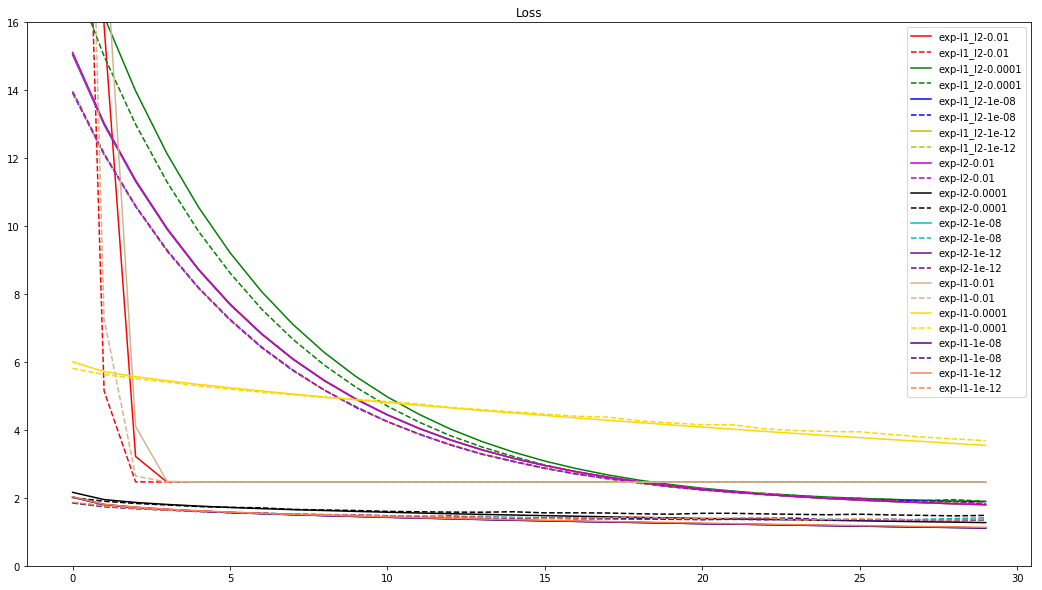

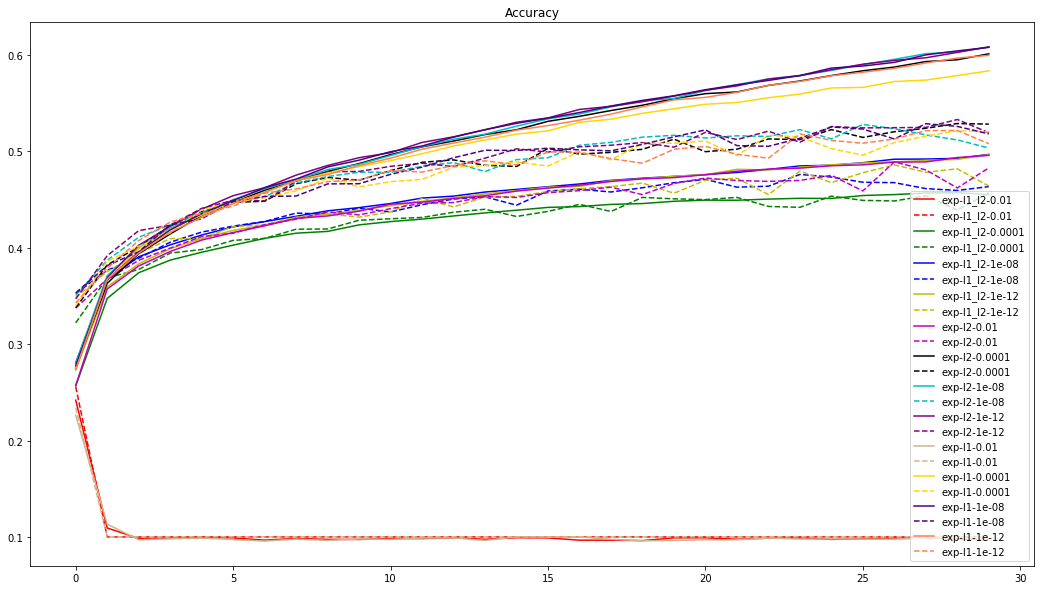

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c", "purple", "tan", "gold", "indigo", "coral"]

plt.figure(figsize=(18,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 16])
plt.legend()
plt.show()

plt.figure(figsize=(18,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()